In [8]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
L_data = pd.read_csv('../merging/L_data_merged.csv', low_memory = False)

In [4]:
L_data.dtypes

date            object
daytype         object
rides            int64
Station Name    object
ADA             object
RED               bool
BLUE              bool
G                 bool
BRN               bool
P                 bool
Pexp              bool
Y                 bool
Pnk               bool
O                 bool
Location        object
Neighborhood    object
City            object
dtype: object

In [5]:
L_data['date'] = pd.to_datetime(L_data['date'], infer_datetime_format=True)

In [6]:
L_data

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
0,2004-10-09,A,1057,Harold Washington Library-State/Van Buren (Bro...,True,False,False,False,True,False,False,False,False,False,"(41.876862, -87.628196)",Chicago Loop,Chicago
1,2010-06-18,W,1154,Central Park (Pink Line),True,False,False,False,False,False,False,False,True,False,"(41.853839, -87.714842)",North Lawndale,Chicago
2,2001-10-30,W,2116,Montrose (Brown Line),True,False,False,False,True,False,False,False,False,False,"(41.961756, -87.675047)",Lincoln Square,Chicago
3,2006-10-26,W,0,Washington/State (Closed),NaN,True,False,False,False,False,False,False,False,False,"(41.8837, -87.6278)",Chicago Loop,Chicago
4,2010-07-07,W,9431,Monroe (Red Line),False,True,False,False,False,False,False,False,False,False,"(41.880745, -87.627696)",Chicago Loop,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,U,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006157,2020-04-27,W,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006158,2020-04-28,W,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006159,2020-04-29,W,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago


In [69]:
L_data_2020 = L_data.loc[L_data['date']>= '01-01-2020']

L_data_2020

,date,daytype,rides,Station Name,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,Neighborhood,City
988858,2020-01-01,U,556,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988859,2020-01-02,W,1362,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988860,2020-01-03,W,1363,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988861,2020-01-04,A,572,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
988862,2020-01-05,U,484,Austin (Green Line),False,False,False,True,False,False,False,False,False,False,"(41.887293, -87.774135)",Austin,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006156,2020-04-26,U,419,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006157,2020-04-27,W,883,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006158,2020-04-28,W,880,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago
1006159,2020-04-29,W,768,"Washington/Wabash (Brown, Green, Orange, Purpl...",True,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)",Chicago Loop,Chicago


In [71]:
yearly_totals = L_data.groupby(pd.Grouper(key='date', freq='Y')).agg({
    'rides': 'sum'
})

yearly_totals

,rides
date,
2001-12-31,151739502
2002-12-31,152364552
2003-12-31,150319580
2004-12-31,148312412
2005-12-31,154987157
2006-12-31,161966231
2007-12-31,157903245
2008-12-31,165290763
2009-12-31,167215635


In [65]:
L_data_2020 = L_data.loc[L_data['date'] >= '01-06-2020' ]

weekly_2020 = L_data_2020.groupby(pd.Grouper(key='date', freq='W')).agg({
    'rides': 'sum'
})

daily_2020 = L_data_2020.groupby('date').agg({
    'rides': 'sum'
})

[Text(0, 0.5, 'Number of Rides'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Daily L Rides in 2020')]

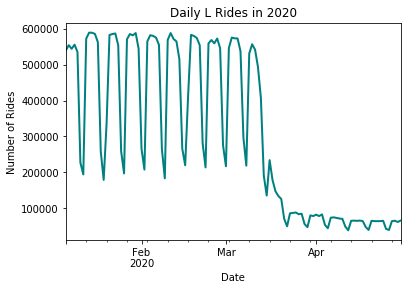

In [66]:
ax = daily_2020.plot(kind = 'line', legend = False, lw =2, color='teal')

ax.set(xlabel="Date", ylabel="Number of Rides", title = "Daily L Rides in 2020")

[Text(0, 0.5, 'Number of Rides'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Weekly L Rides in 2020')]

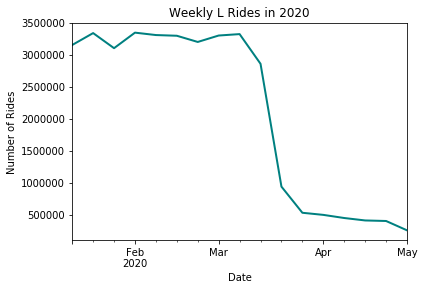

In [68]:
ax = weekly_2020.plot(kind = 'line', legend = False, lw =2, color='teal')

ax.set(xlabel="Date", ylabel="Number of Rides", title = "Weekly L Rides in 2020")